<a href="https://colab.research.google.com/github/ruchithareddy269/DM--Assignment-5/blob/main/4_images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# note that pip install skimage might throw an error, rather use this
!pip install scikit-image


references:https://www.kaggle.com/code/databeru/dogs-cats-classification-tensorflow-acc-99-25#Dogs&Cats-classification-with-Deep-LearningDogs&Cats-classification-with-Deep-Learning

In [2]:
import os
import shutil
import random
import numpy as np
from zipfile import ZipFile as unzip
from google.colab import files
import matplotlib.pyplot as plt


In [3]:
!pip install numpy
!pip install matplotlib
!pip install seaborn
!pip install tensorflow

In [5]:
import numpy as np
import cv2
import os
import random
import matplotlib.pyplot as plt
import pickle

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import numpy as np
import pandas as pd
from pathlib import Path
import os.path
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
from time import perf_counter
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score
from IPython.display import Markdown, display

def printmd(string):
    # Print with Markdowns
    display(Markdown(string))
# Create a list with the filepaths for training and testing
dir_ = Path('../input/dogs-cats-images/dataset/training_set')
train_filepaths = list(dir_.glob(r'**/*.jpg'))

dir_ = Path('../input/dogs-cats-images/dataset/test_set')
test_filepaths = list(dir_.glob(r'**/*.jpg'))

In [7]:
def proc_img(filepath):
    """ Create a DataFrame with the filepath and the labels of the pictures
    """

    labels = [str(filepath[i]).split("/")[-2] \
              for i in range(len(filepath))]

    filepath = pd.Series(filepath, name='Filepath').astype(str)
    labels = pd.Series(labels, name='Label')

    # Concatenate filepaths and labels
    df = pd.concat([filepath, labels], axis=1)

    # Shuffle the DataFrame and reset index
    df = df.sample(frac=1,random_state=0).reset_index(drop = True)

    return df

train_df = proc_img(train_filepaths)
test_df = proc_img(test_filepaths)

print(f'Number of pictures in the training dataset: {train_df.shape[0]}\n')
print(f'Number of pictures in the test dataset: {test_df.shape[0]}\n')
print(f'Number of different labels: {len(train_df.Label.unique())}\n')
print(f'Labels: {train_df.Label.unique()}')

Number of pictures in the training dataset: 0

Number of pictures in the test dataset: 0

Number of different labels: 0

Labels: []


<ipython-input-7-38f8136efa15>:8: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  filepath = pd.Series(filepath, name='Filepath').astype(str)
<ipython-input-7-38f8136efa15>:9: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  labels = pd.Series(labels, name='Label')
<ipython-input-7-38f8136efa15>:8: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  filepath = pd.Series(filepath, name='Filepath').astype(str)
<ipython-input-7-38f8136efa15>:9: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  labels = pd.Series(labels, name='Label')


In [8]:
# The DataFrame with the filepaths in one column and the labels in the other one
train_df.head(5)

,Filepath,Label


In [9]:
import os
import time
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from google.colab import drive
from keras.models import load_model
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [10]:
path = '/content/drive/My Drive/dm-assignment-5/Cats_vs_dogs_classification_dataset'
train_dir = '/content/drive/My Drive/dm-assignment-5/Cats_vs_dogs_classification_dataset/train'
validation_dir = '/content/My Drive/drive/dm-assignment-5/Cats_vs_dogs_classification_dataset/validation'


In [11]:
train_cats_dir = '/content/drive/My Drive/dm-assignment-5/Cats_vs_dogs_classification_dataset/train/cats'
train_dogs_dir = '/content/drive/My Drive/dm-assignment-5/Cats_vs_dogs_classification_dataset/train/dogs'

validation_cats_dir = '/content/drive/My Drive/dm-assignment-5/Cats_vs_dogs_classification_dataset/validation/cats'
validation_dogs_dir ='/content/drive/My Drive/dm-assignment-5/Cats_vs_dogs_classification_dataset/validation/dogs'


In [12]:
num_cats_train = len(os.listdir(train_cats_dir))
num_dogs_train = len(os.listdir(train_dogs_dir))

num_cats_validation = len(os.listdir(validation_cats_dir))
num_dogs_validation = len(os.listdir(validation_dogs_dir))


num_cats_train

1000

In [14]:
print('Total Training Images of Cats',num_cats_train)
print('Total Training Images of Dogs',num_dogs_train)
print('\n************************\n')
print('Total Validation Images of Cats',num_cats_validation)
print('Total Validation Imagges of Dogs',num_dogs_validation)
print('\n************************\n')


Total Training Images of Cats 1000
Total Training Images of Dogs 1000

************************

Total Validation Images of Cats 500
Total Validation Imagges of Dogs 500

************************



**Function for plotting images**

In [16]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()

plt.show()

**Applying Data Agumentation**

In [17]:
plt.show()

In [18]:
BATCH_SIZE = 120
IMG_SHAPE  = 150
image_gen_train = ImageDataGenerator(rescale=1./255,rotation_range=40,width_shift_range=0.2,height_shift_range=0.2,shear_range=0.2,
                                     zoom_range=0.2,horizontal_flip=True,fill_mode='nearest')

train_data_gen = image_gen_train.flow_from_directory(batch_size=BATCH_SIZE,
                                                     directory=train_dir,
                                                     shuffle=True,
                                                     target_size=(IMG_SHAPE,IMG_SHAPE),
                                                     class_mode='binary')

Found 2000 images belonging to 2 classes.


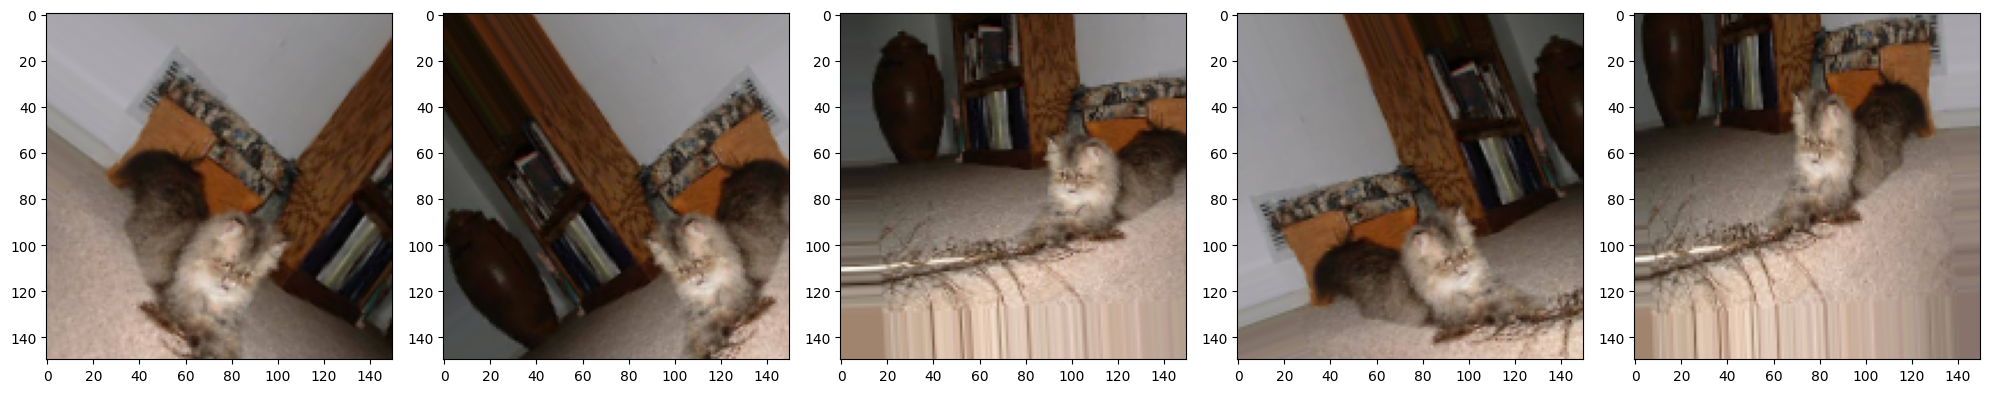

In [21]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [23]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
image_gen_val = ImageDataGenerator(rescale=1./255)


In [26]:

val_data_gen = image_gen_val.flow_from_directory(batch_size=BATCH_SIZE,
                                                 directory=train_dir,
                                                 target_size=(IMG_SHAPE, IMG_SHAPE),
                                                 class_mode='binary')

image_gen_test = ImageDataGenerator(rescale=1./255)

test_data_gen = image_gen_test.flow_from_directory(batch_size=BATCH_SIZE,
                                                 directory=train_dir,
                                                 target_size=(IMG_SHAPE, IMG_SHAPE),
                                                 class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [28]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Dropout(0.6),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(2)
])
model